In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_X.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_y.csv')
X_train['left'] = y_train


In [2]:
X_train.columns

Index(['RecordId', 'Gender', 'Distance', 'YearsWorked', 'TrainingHours',
       'WorkLifeBalance', 'NumOfProjects', 'JobInvolvement', 'TeamSize',
       'MentorshipReceived', 'TechSkillLevel', 'AttendanceRate', 'StressLevel',
       'PeerFeedbackScore', 'AnnualLeaveDays', 'Certifications',
       'SkillDevelopmentCourses', 'ProjectComplexity', 'WorkSatisfactionScore',
       'JobEngagementScore', 'PhysicalActivityScore', 'MentalWellbeingScore',
       'DepartmentCode', 'PreviousSalary', 'Salary', 'SelfReview',
       'SupervisorReview', 'left'],
      dtype='object')

In [3]:
X_train.describe()

,RecordId,Gender,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,TechSkillLevel,...,SkillDevelopmentCourses,ProjectComplexity,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,SelfReview,SupervisorReview,left
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,498958.000000,499005.000000,500000.000000
mean,250099.500000,0.401232,7.002552,49.483502,3.002836,10.007036,2.996948,9.998880,0.50067,2.999154,...,0.499882,3.001772,4.997358,4.995824,4.996368,5.003052,3.999612,4.399968,4.096981,0.360922
std,144337.711634,0.490148,1.868050,28.866048,1.413991,5.478671,1.414536,5.479373,0.50000,1.414082,...,0.500000,1.413426,2.583222,2.582022,2.579361,2.580972,2.161918,0.663515,0.945597,0.480268
min,100.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000
25%,125099.750000,0.000000,6.000000,24.000000,2.000000,5.000000,2.000000,5.000000,0.00000,2.000000,...,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,0.000000
50%,250099.500000,0.000000,7.000000,50.000000,3.000000,10.000000,3.000000,10.000000,1.00000,3.000000,...,0.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,0.000000
75%,375099.250000,1.000000,8.000000,74.000000,4.000000,15.000000,4.000000,15.000000,1.00000,4.000000,...,1.000000,4.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,5.000000,1.000000
max,500099.000000,1.000000,14.000000,99.000000,5.000000,19.000000,5.000000,19.000000,1.00000,5.000000,...,1.000000,5.000000,9.000000,9.000000,9.000000,9.000000,7.000000,5.000000,5.000000,1.000000


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RecordId                 500000 non-null  int64  
 1   Gender                   500000 non-null  int64  
 2   Distance                 499492 non-null  object 
 3   YearsWorked              500000 non-null  int64  
 4   TrainingHours            500000 non-null  int64  
 5   WorkLifeBalance          500000 non-null  int64  
 6   NumOfProjects            500000 non-null  int64  
 7   JobInvolvement           500000 non-null  int64  
 8   TeamSize                 500000 non-null  int64  
 9   MentorshipReceived       500000 non-null  int64  
 10  TechSkillLevel           500000 non-null  int64  
 11  AttendanceRate           500000 non-null  float64
 12  StressLevel              500000 non-null  int64  
 13  PeerFeedbackScore        500000 non-null  int64  
 14  Annu

In [4]:
X_train.head()

,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,...,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,PreviousSalary,Salary,SelfReview,SupervisorReview,left
0,100,1,>30miles,7,91,4,14,3,8,1,...,3,2,9,5,5,72K,73K,4.0,4.0,0
1,101,0,~10miles,10,52,5,9,2,10,0,...,3,4,8,1,1,62K,64K,4.0,4.0,0
2,102,0,~10miles,10,80,3,13,3,16,0,...,7,2,7,8,5,73K,74K,4.0,2.0,1
3,103,0,~15miles,5,6,3,15,5,16,0,...,6,9,5,5,1,63K,64K,5.0,5.0,0
4,104,1,~10miles,10,3,2,13,3,18,0,...,3,4,4,4,2,60K,64K,4.0,4.0,0


In [5]:
X_train.isnull().sum()

RecordId                      0
Gender                        0
Distance                    508
YearsWorked                   0
TrainingHours                 0
WorkLifeBalance               0
NumOfProjects                 0
JobInvolvement                0
TeamSize                      0
MentorshipReceived            0
TechSkillLevel                0
AttendanceRate                0
StressLevel                   0
PeerFeedbackScore             0
AnnualLeaveDays               0
Certifications                0
SkillDevelopmentCourses       0
ProjectComplexity             0
WorkSatisfactionScore         0
JobEngagementScore            0
PhysicalActivityScore         0
MentalWellbeingScore          0
DepartmentCode                0
PreviousSalary                0
Salary                        0
SelfReview                 1042
SupervisorReview            995
left                          0
dtype: int64

Will need to impute distance, self review, supervisor review.

In [7]:
X_train['left'].value_counts()

left
0    319539
1    180461
Name: count, dtype: int64

Data is Unbalanced, ~60% stayed, 40% left. 

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 5))


This is the bar graph of all the columns. Below this cell, I filtered out the ones with noticable differences.

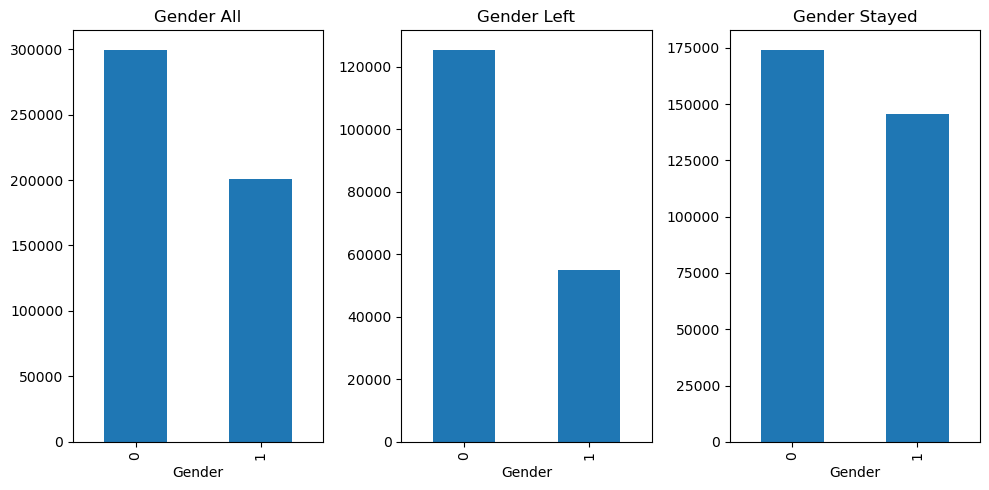

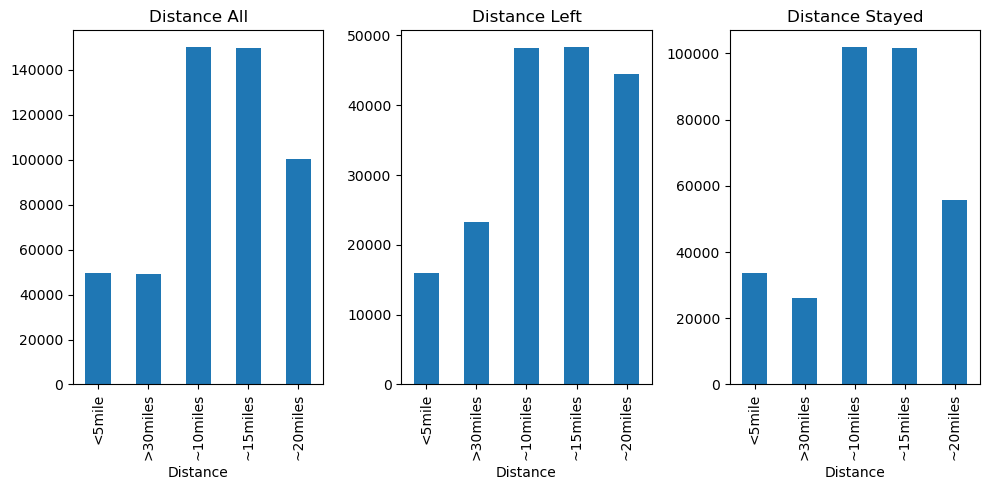

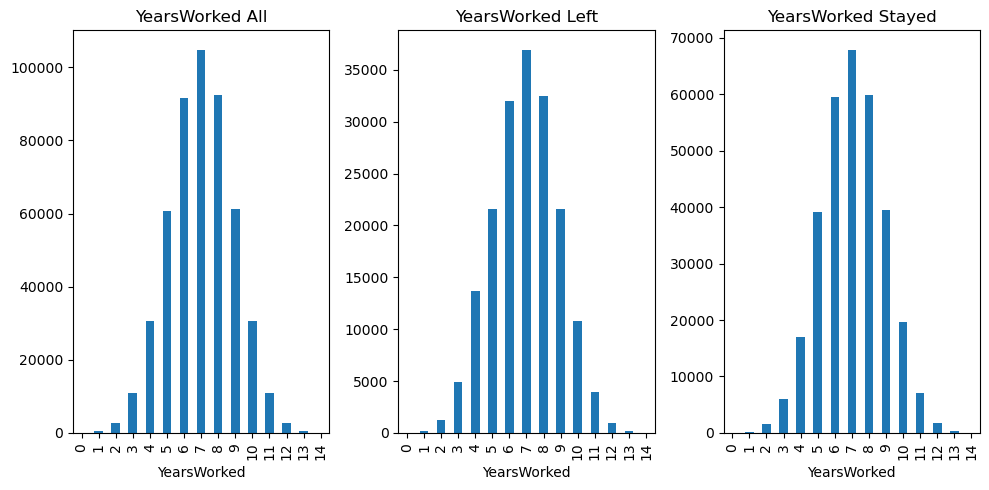

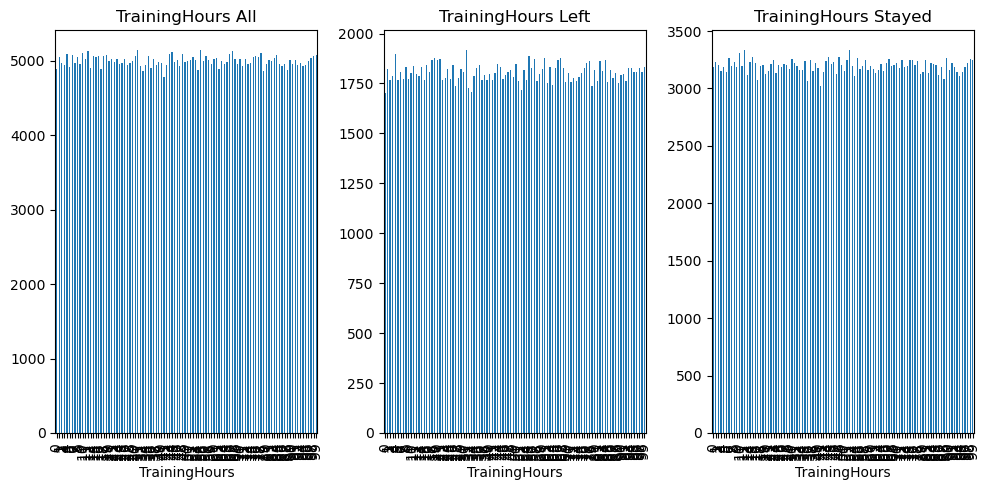

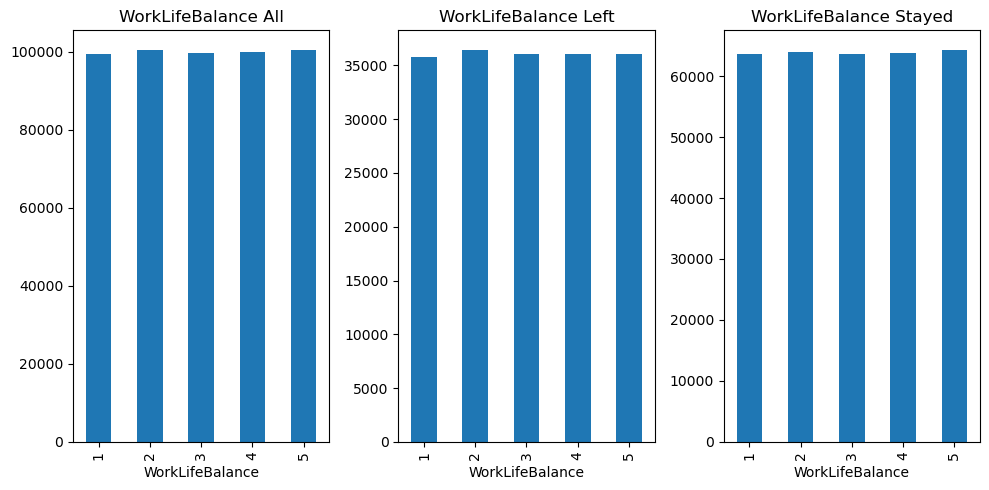

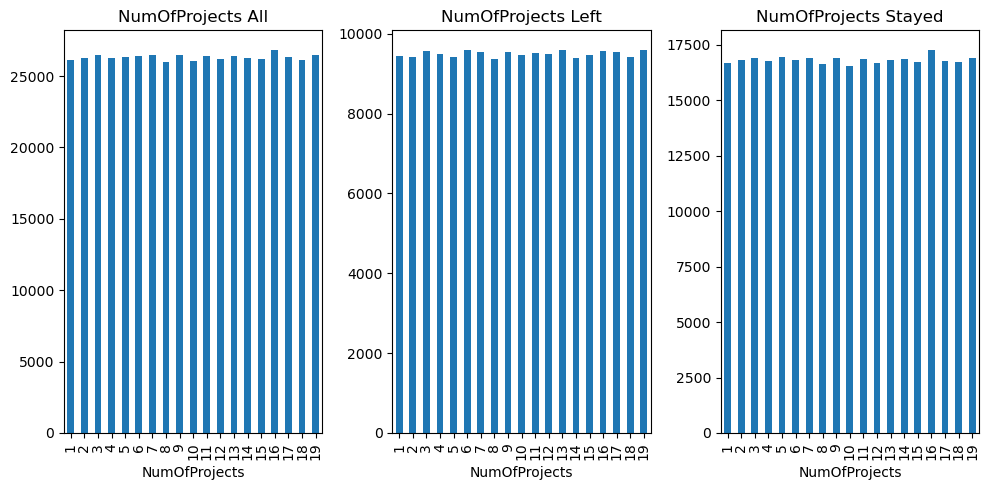

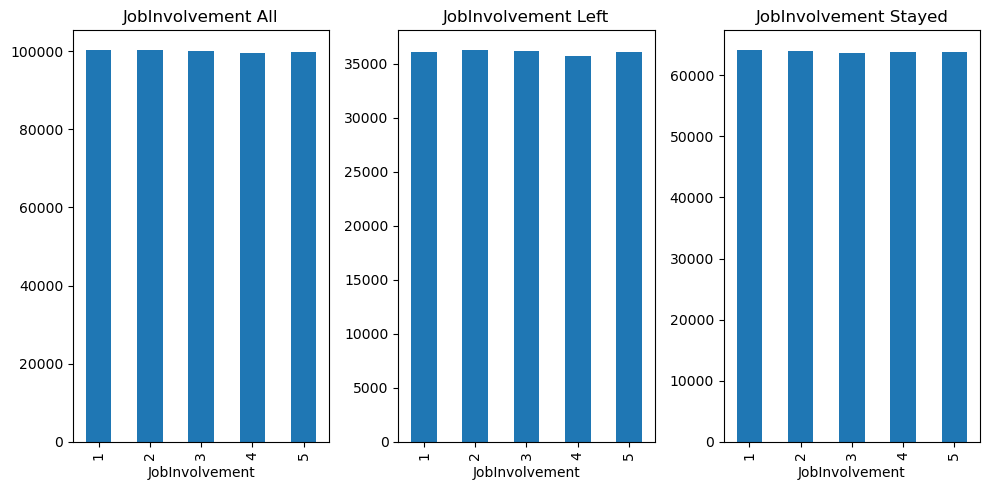

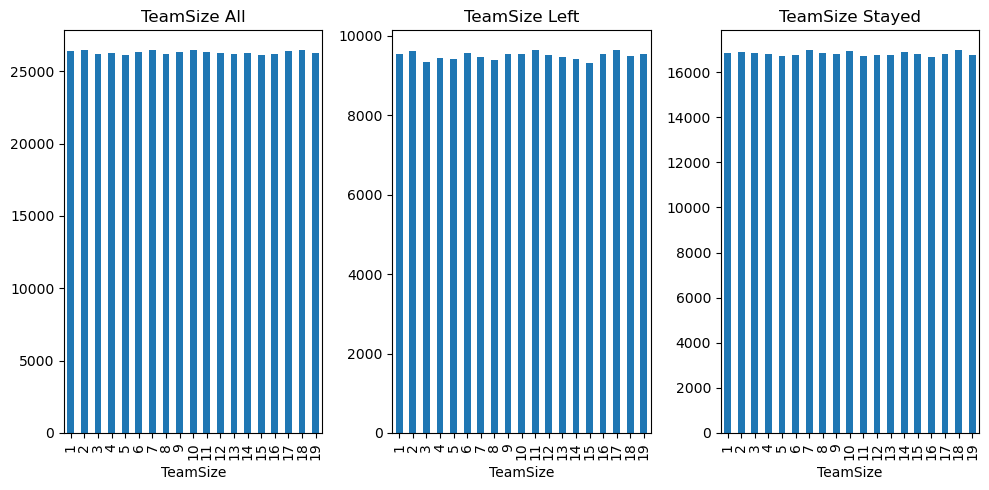

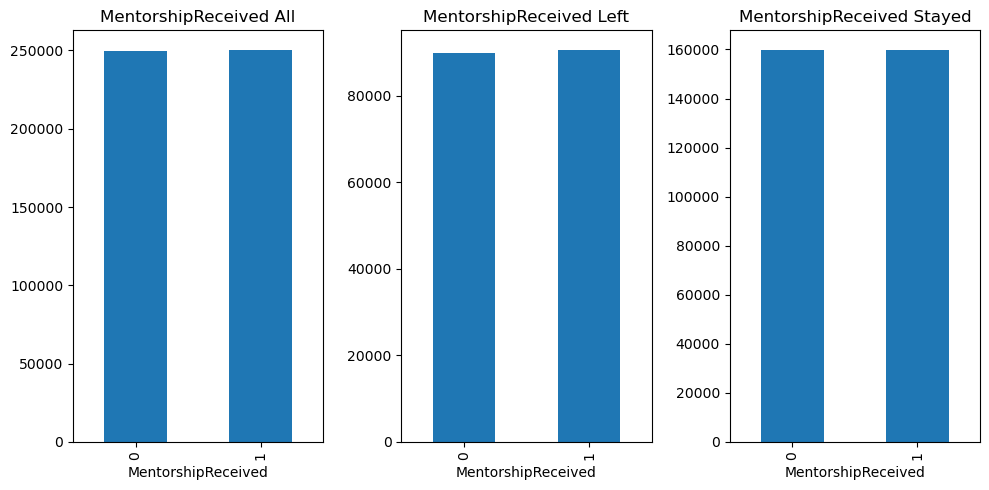

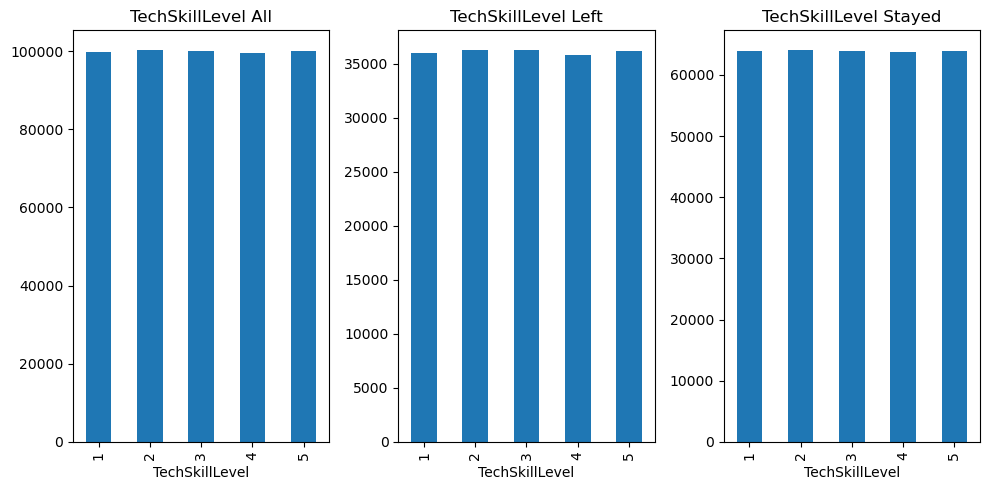

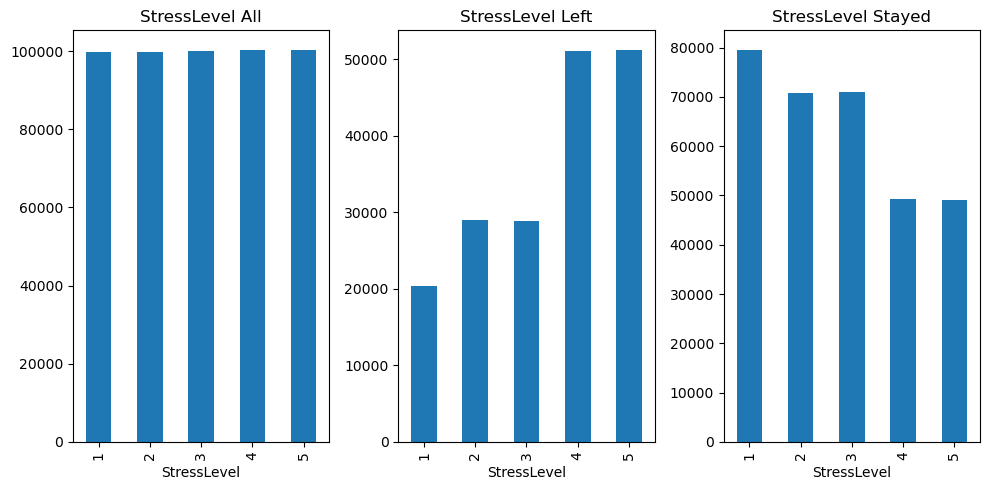

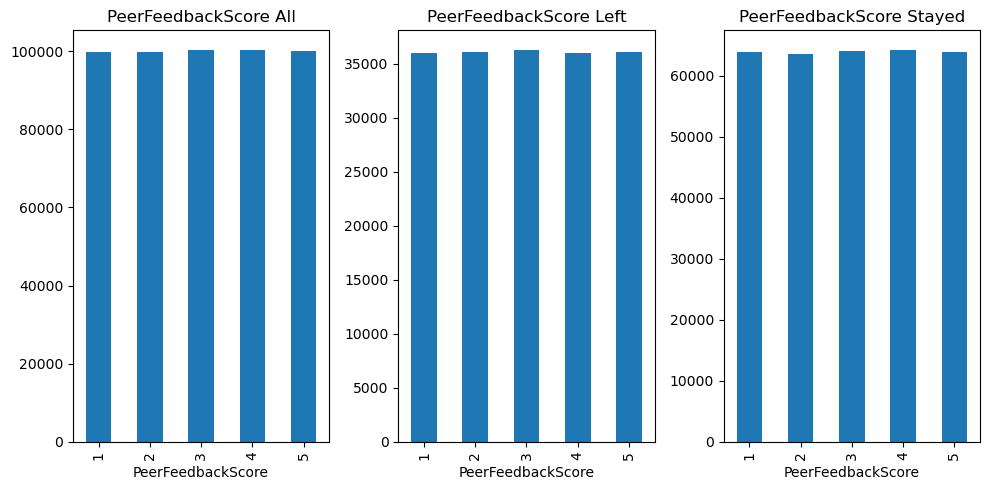

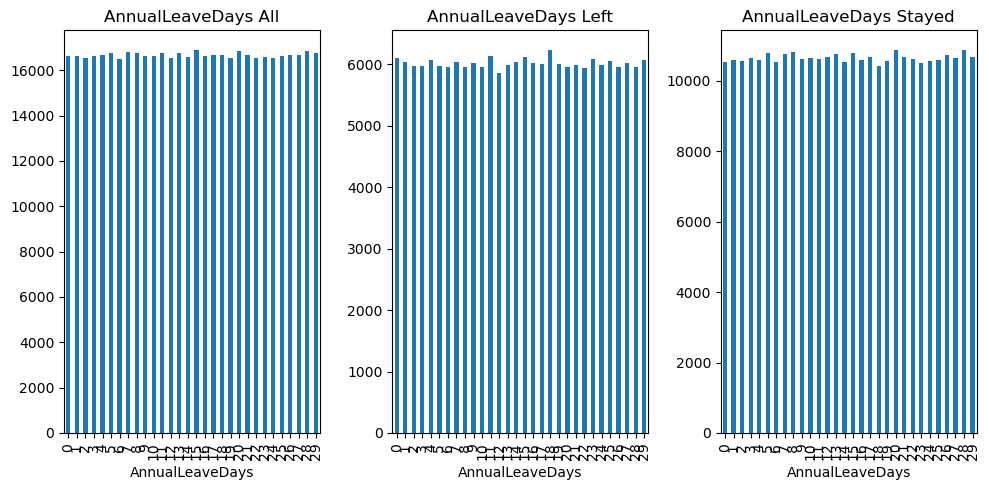

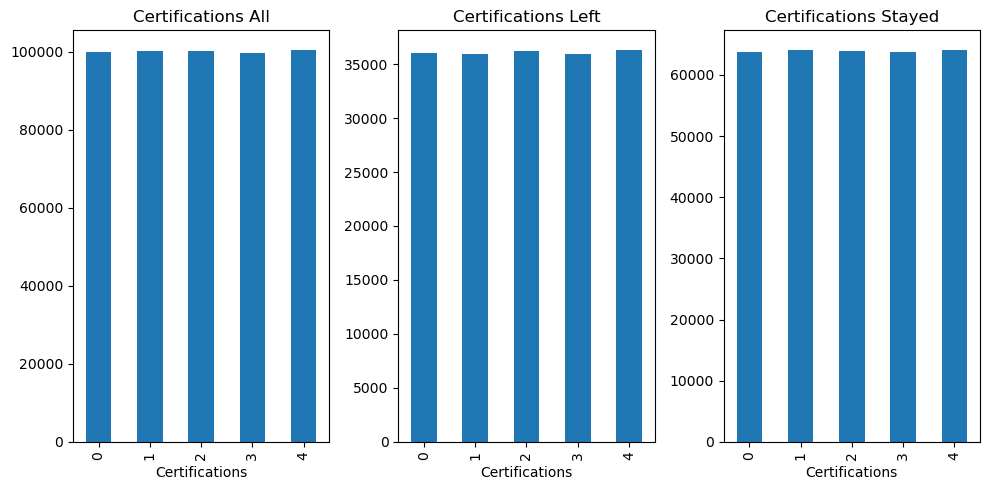

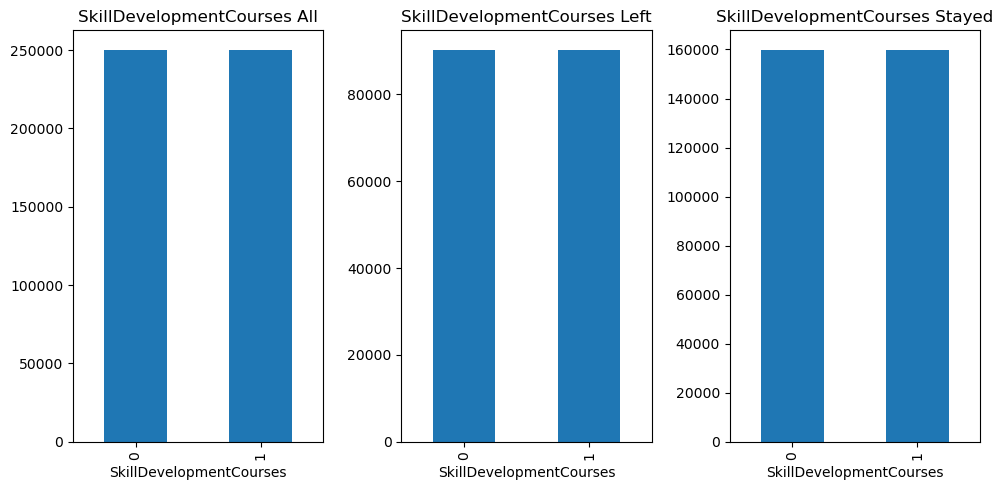

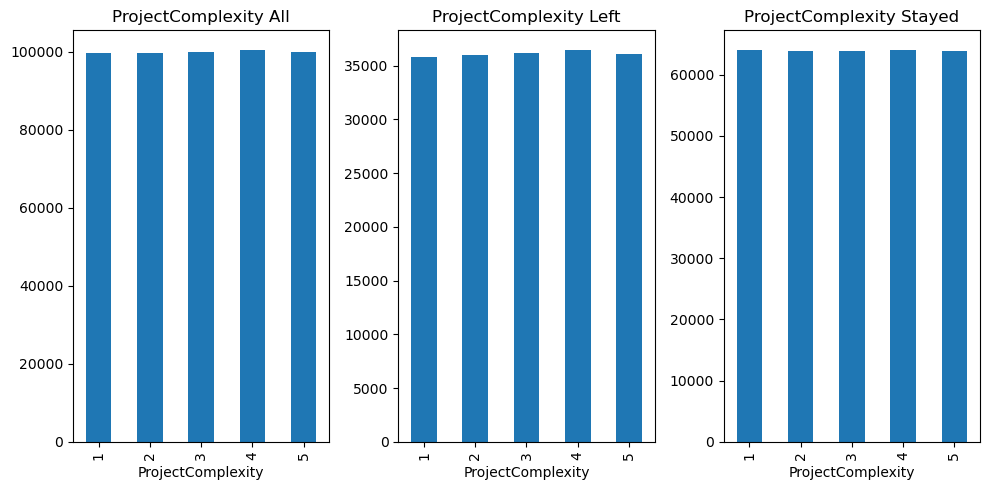

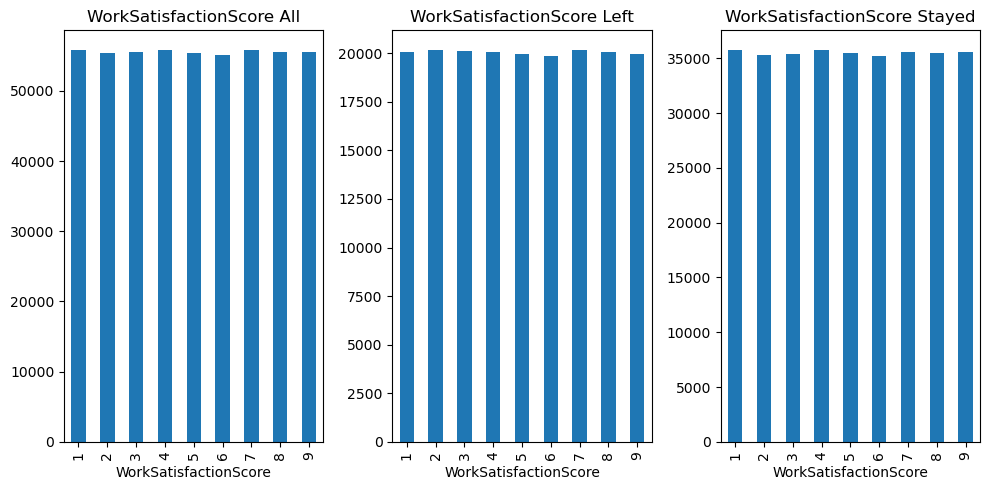

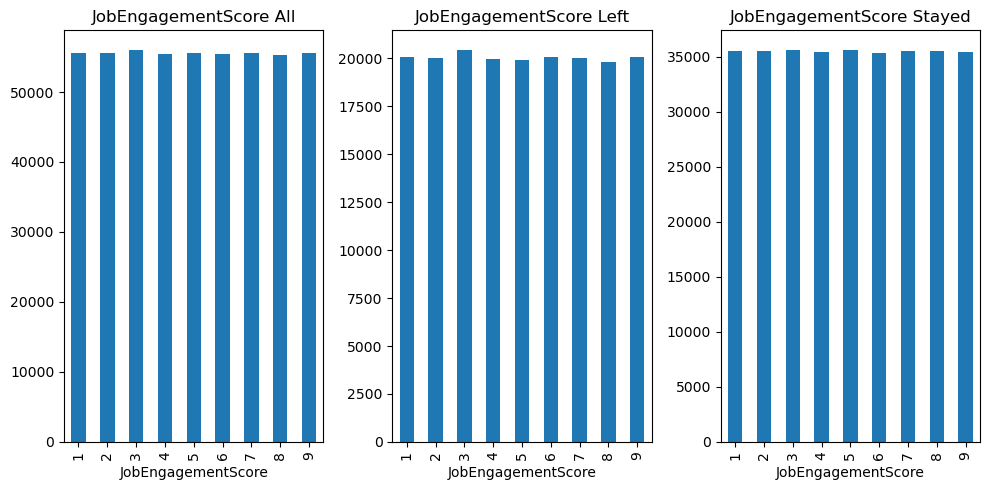

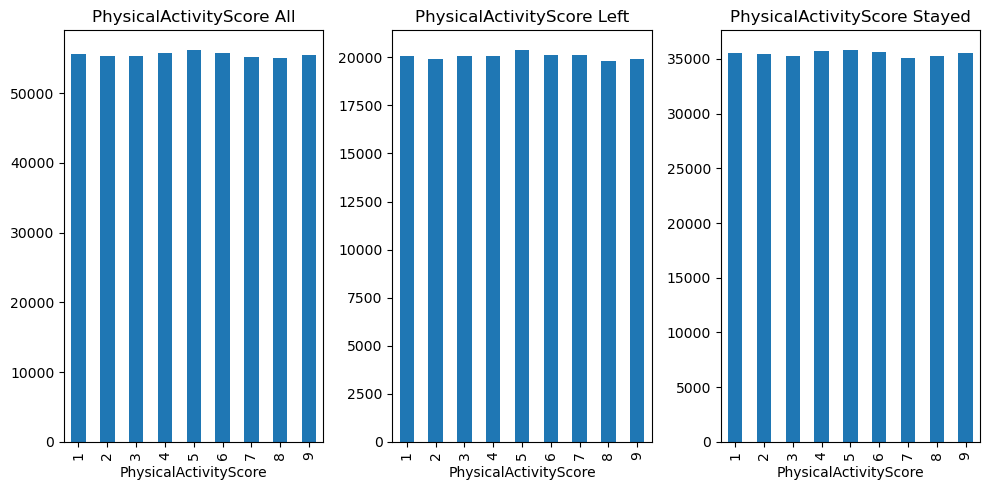

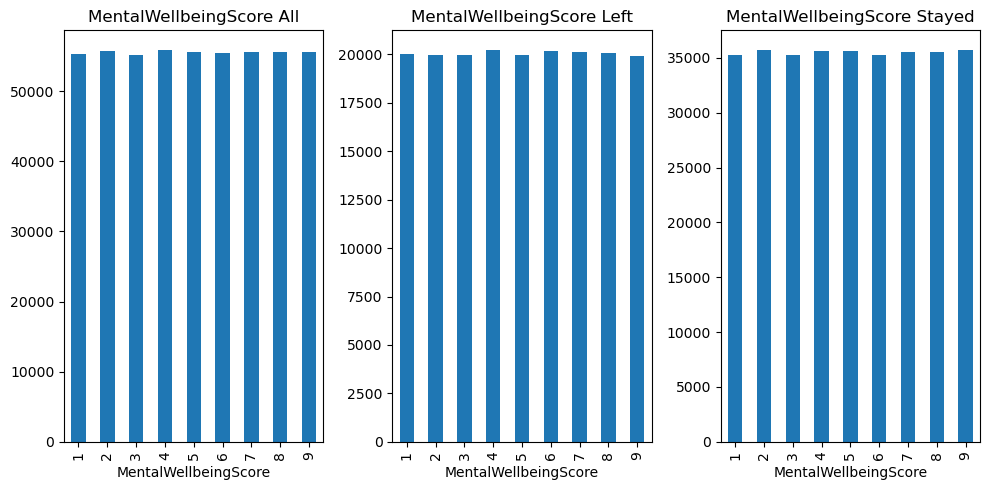

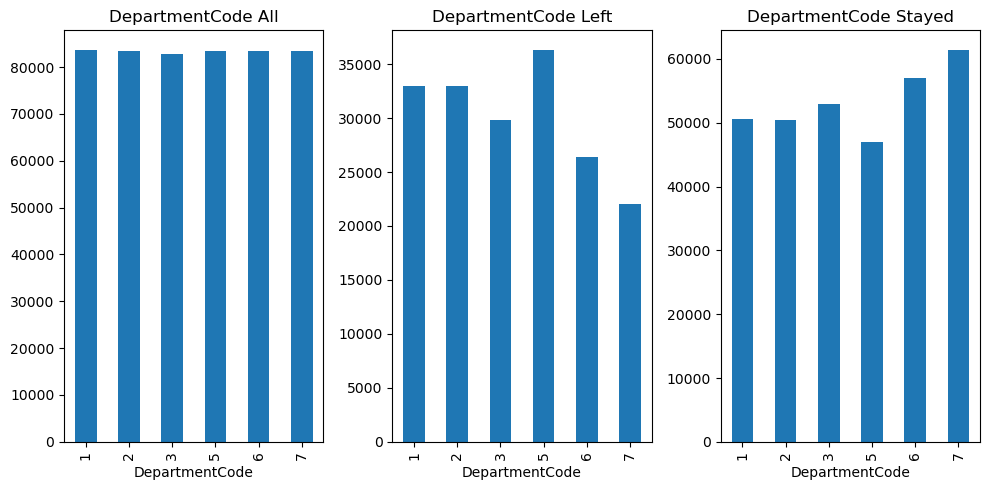

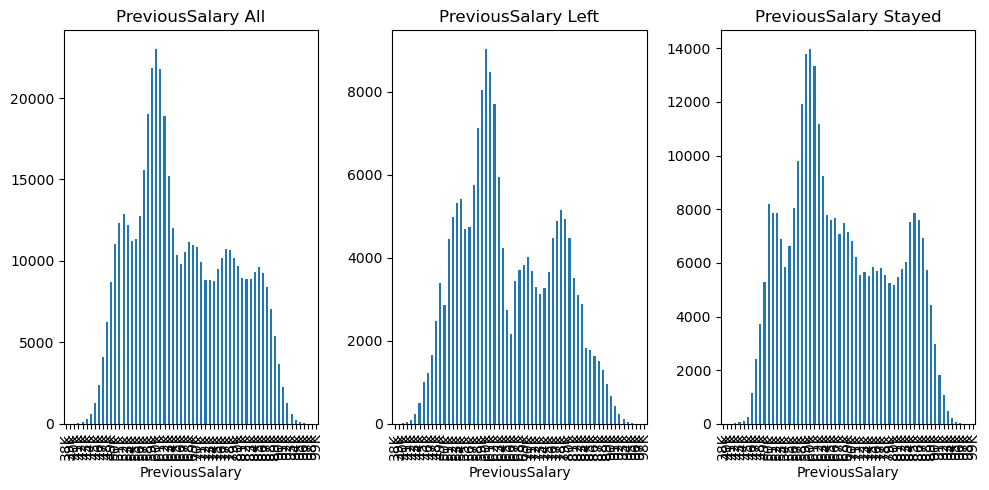

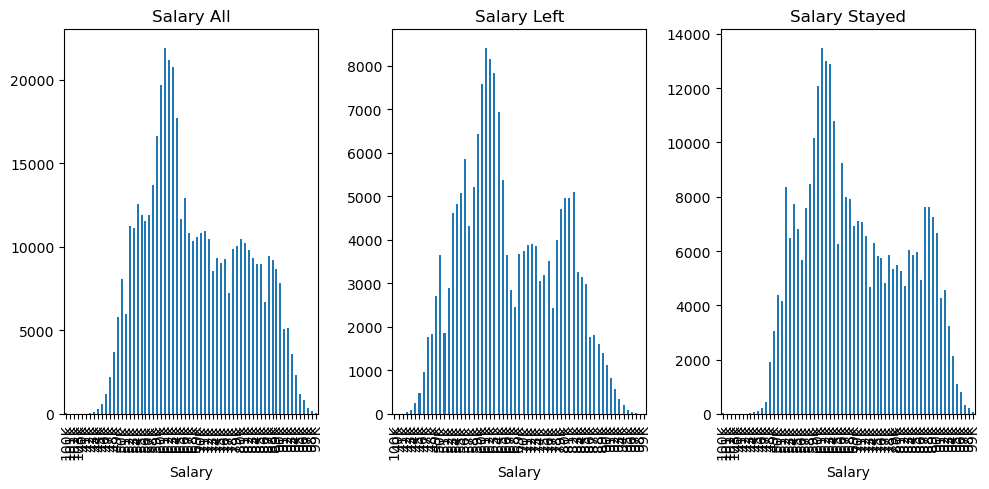

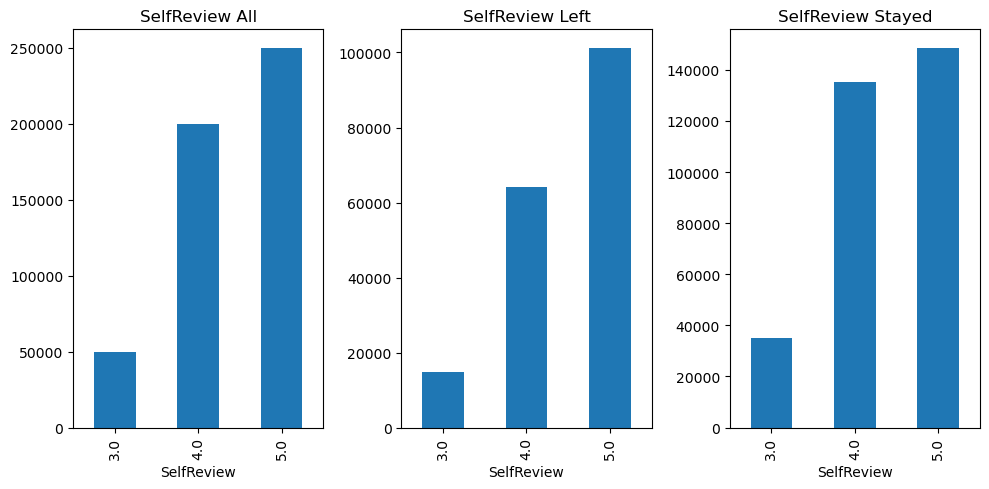

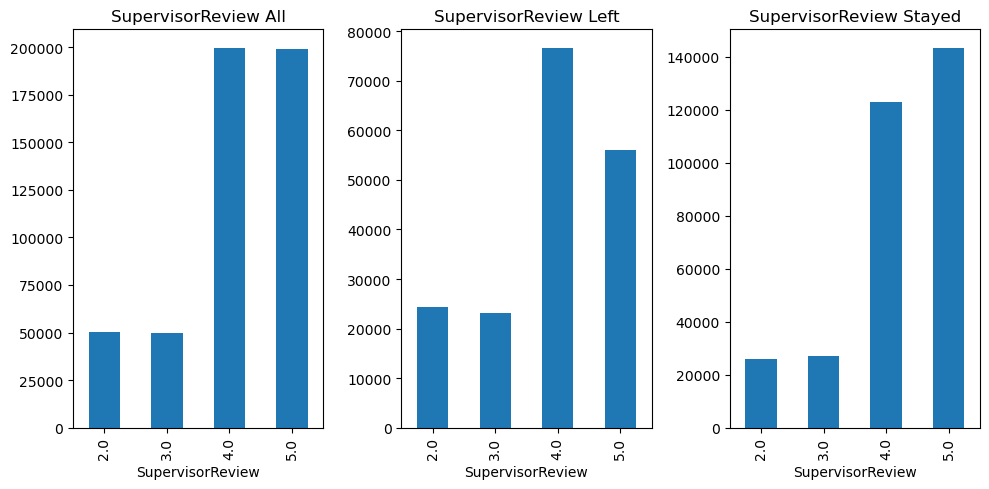

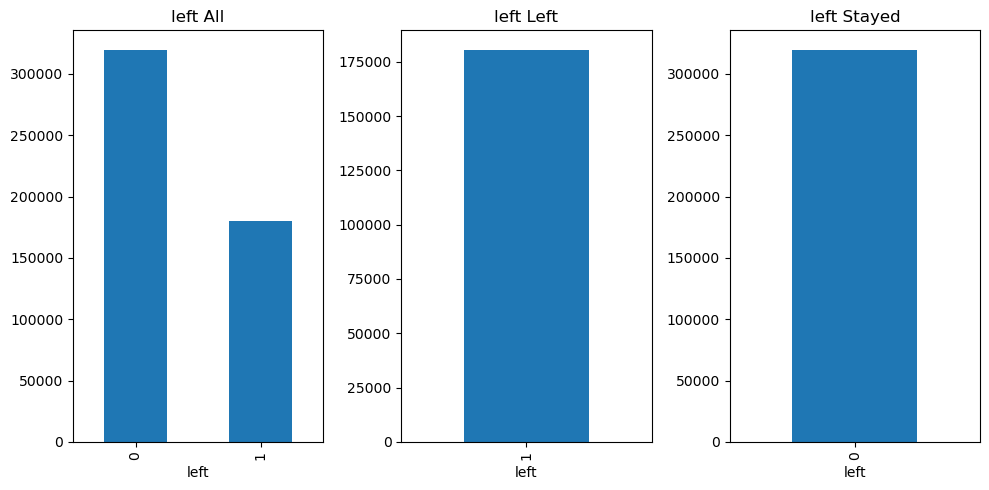

In [66]:

eda_columns = X_train.drop(['RecordId', 'AttendanceRate'], axis = 1).columns
for col in eda_columns:
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    #print(col)
    #print(X_train[col].nunique())
    (X_train[col].value_counts().sort_index()).plot(kind='bar',ax=axes[0], title= col + ' All')
    (X_train[X_train['left']==1][col].value_counts().sort_index()).plot(kind='bar',ax=axes[1], title=col+' Left')
    (X_train[X_train['left']==0][col].value_counts().sort_index()).plot(kind='bar',ax=axes[2], title=col+ ' Stayed')
    plt.tight_layout()
    plt.show()
    #print(X_train[col].value_counts().sort_index())

The Below Graphs seem to mark the variables that noticably correlate with an employee leaving or not.

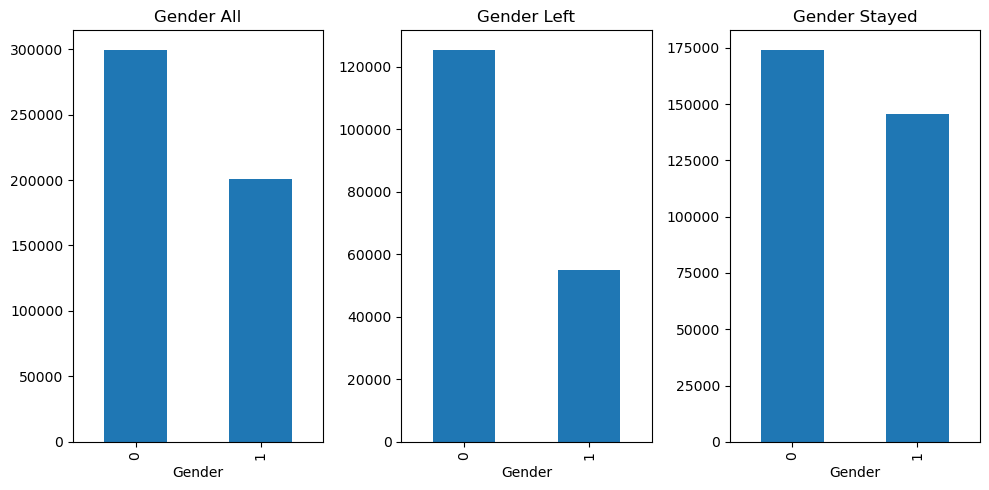

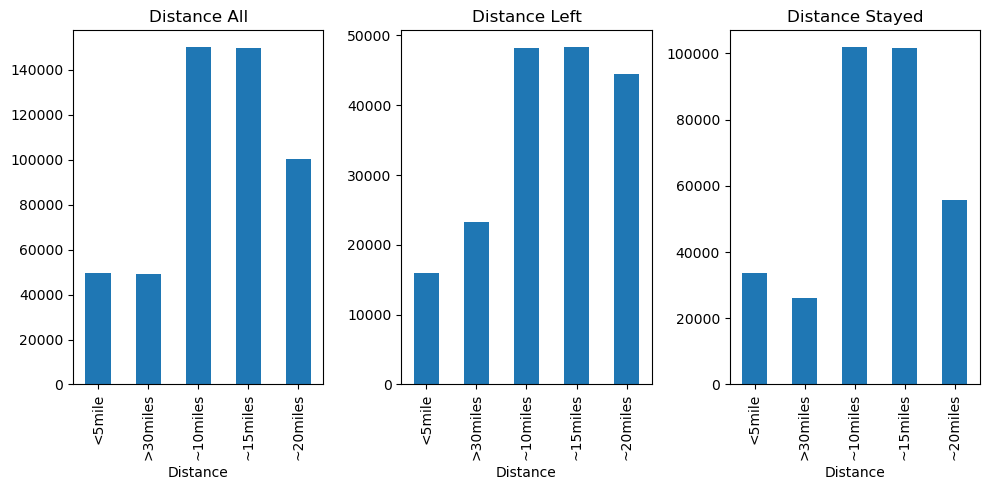

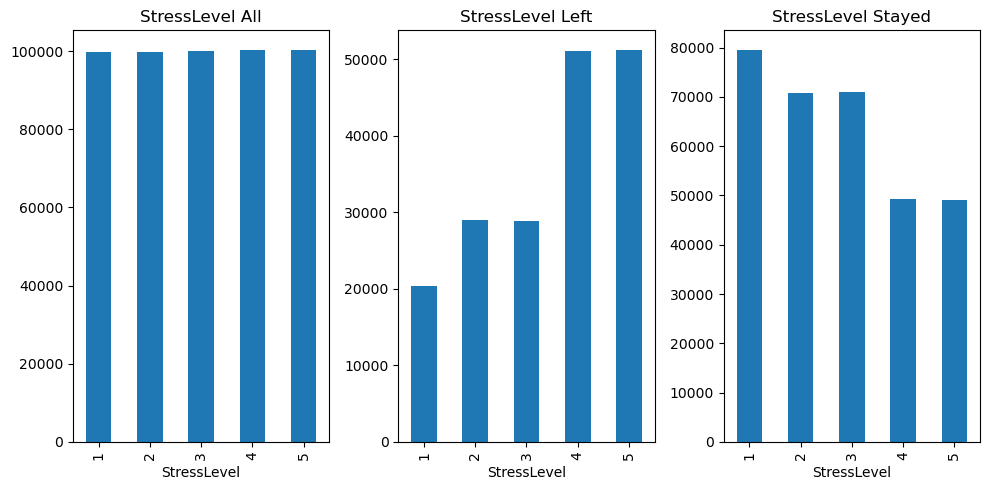

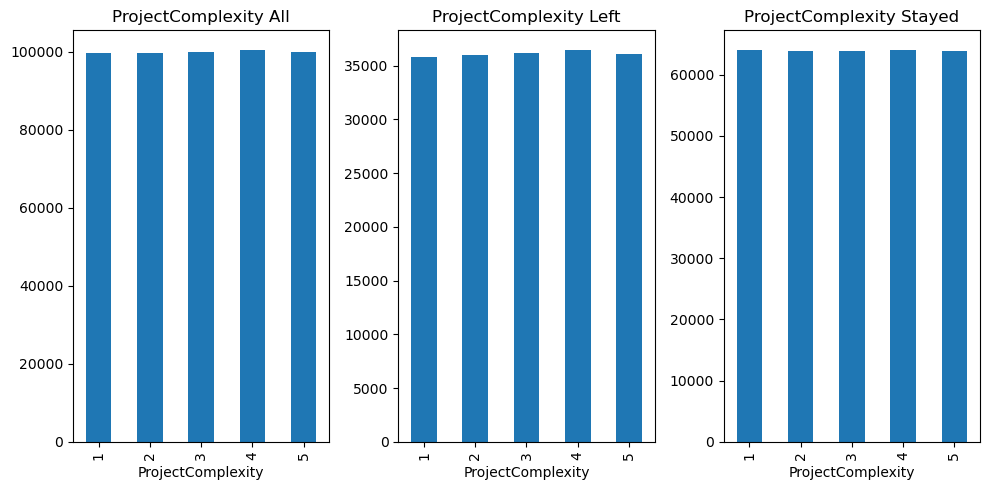

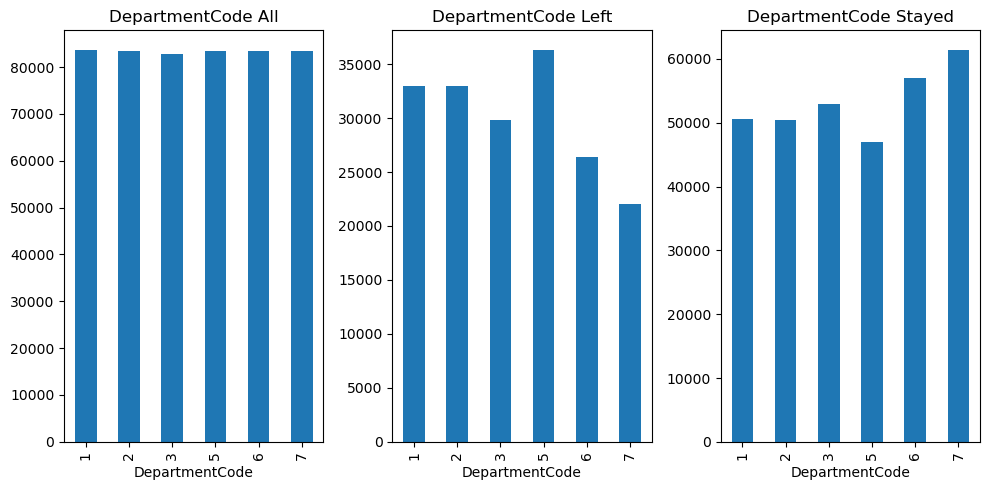

KeyError: 'Previoussalary'

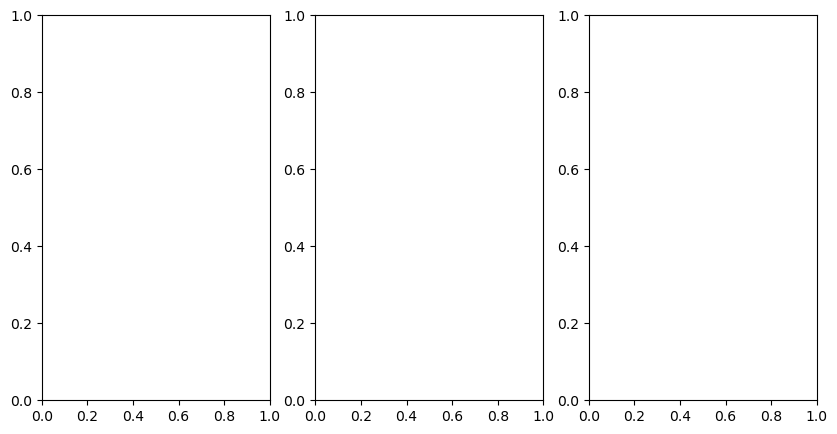

In [68]:
leaving_cols = ['Gender','Distance', 'StressLevel', 'ProjectComplexity', 'DepartmentCode','Previoussalary', 'Salary', 'SelfReview', 'SupervisorReview']
for col in leaving_cols:
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    #print(col)
    #print(X_train[col].nunique())
    (X_train[col].value_counts().sort_index()).plot(kind='bar',ax=axes[0], title= col + ' All')
    (X_train[X_train['left']==1][col].value_counts().sort_index()).plot(kind='bar',ax=axes[1], title=col+' Left')
    (X_train[X_train['left']==0][col].value_counts().sort_index()).plot(kind='bar',ax=axes[2], title=col+ ' Stayed')
    plt.tight_layout()
    plt.show()